# <center> Predicting Customer Response To Bank's Telemarketing Campaign 

# Table of Contents

1. **[Project Background](#1)**
2. **[Data Cleaning](#part2)**
3. **[Exploratory Data Analysis](#part3)**
4. **[Data Visualization](#part4)**
5. **[Machine Learning](#part5)**
6. **[Conclusion & Recommendations](#part6)**

# Part 1. Project Background

<img src='https://i0.wp.com/basyspro.com/wp-content/uploads/2020/07/What-Will-Bank-Marketing-Look-Like-in-the-Future-Infographic-Social-1.jpg?fit=1200%2C628&ssl=1' width='550'>

At the moment, the spending of marketing in the banking industry is tremendous. In other words this is crucial for banks to optimize marketing strategies and enhance its effectiveness. If we can understand the customer's need, it will lead to more effective marketing plans, smarter product designs and improved customer satisfaction.

###  Main Objective : enhance the effectiveness of bank's telemarketing campaign

In this project, we will focus on to how we can enable the bank to develop a better understanding of its customer base, predict customer's response to bank's telemarketing campaign and set up a target customer profile for future marketing plans.

By analyzing customer features like transaction history, demographics and some economic index the institution or in this case is the bank will be able to predict customer saving behaviour and discover which type of customers is more likely to make term deposits or accept the campaign. When then bank has information to develop better marketing plan, the bank can then focus its marketing efforts on those customers only. In this phase, this will allow the bank to secure more deposits from customers more effectively and increase customer satisfaction by reducing undesirable or unnecessary adverstisement for certain customers.

References :
* [What is deposit?](https://www.investopedia.com/terms/d/deposit.asp)
* [What Is a Certificate of Deposit (CD)?](https://www.investopedia.com/terms/c/certificateofdeposit.asp)

# Part 2. Data Cleaning <a id="part2"></a>

<img src='https://d3caycb064h6u1.cloudfront.net/wp-content/uploads/2021/06/datacleaning-2048x1399-1.jpg' width='500'>

## Load the raw data

The dataset which we use is about the direct phone call of telemarketing campaign of a bank, which aim to promote term deposits among existing customers. This dataset was released by portuguese banking institution from May 2008 to November 2010. It is publicly available in the UCI Machine Learning Repository, which can be accessed from http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

df = pd.read_csv('bank-additional-full.csv', sep=';')

In [2]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In this dataset there are 41,188 observations. Each row represents an existing customer that the bank reached via phone callss.
* For each row, the dataset records **21 input** that stand both for quantitive and qualitive atttributes of the customer, such as job, education, housing and loan status.
* There is **a single binary output variable** that represents with "yes" or "no", this variable revealing the outcomes of the phone calls or in other words is the customer accepts the campaign or not.

## Clean the dataset

In [3]:
# Check if there are missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

It looks like there are no missing values in this dataset, but there are values such as "unknown" or "others" which are helpless just like missing values. Thus, these ambiguous values will be removed from the dataset. 

In [4]:
# Check the attributes data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# group column names based on type
categoricals = df.select_dtypes(exclude=["int64","float64"])
categoricals

# We want to see if there are value like "unknown,others,null,etc" in categorical attributes
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of job column
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

Value counts of marital column
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

Value counts of education column
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

Value counts of default column
no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

Value counts of housing column
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

Value counts of l

`job`, `marital`, `default`, `housing`,`loan` are attributes which has unknown values but for `poutcome` it should removed because more than 50% of the data are unknown/nonexistent. Except `poutcome` we will try to fill it with the mode or just remove the unknown values.

In [6]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [7]:
# Step 1 : Replace the unkown as NaN or Missing Values when load the new dataframe
df2 = pd.read_csv('bank-additional-full.csv',sep=';',na_values =['unknown'])

# Step 2 : Delete the 'poutcome' column because more than 50% rows are nonexistent or unkown
df2 = df2.drop(['poutcome'],axis = 1)

In [8]:
# Check the missing values again after the unkown values became NaN
df2.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [9]:
# Check how many absolute values and it's percentage
data_null = df2.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df))*100,2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value,percentage
0,default,8597,20.87
1,education,1731,4.20
2,housing,990,2.40
3,loan,990,2.40
4,job,330,0.80
5,marital,80,0.19


In [10]:
# Check how many percentage total missing values
data_null.percentage.sum()

30.86

There are **nearly 31% of the missing values!**. Because it exceed 5% so we can not drop it, instead we will fill the missing values with mode. Remember, **attributes that have missing values are all categorical!**.

### 2.1 Impute the missing values with mode

In [11]:
# Separate the numeric and categorical data, in case if we have missing values in numeric and categorical but 
# turn out that we only have missing values in categorical data
df2_categorical = df2.select_dtypes(exclude=['int64','float64'])
df2_numerical = df2.select_dtypes(include=['int64','float64'])

In [12]:
df2_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,no
2,services,married,high.school,no,yes,no,telephone,may,mon,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,no
4,services,married,high.school,no,no,yes,telephone,may,mon,no


In [13]:
df2_numerical.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [14]:
# Make new dataframe as dataframe without missing values
df3 = df2.copy()

# Fill the missing values with median
df3["default"] = df3["default"].fillna(df3["default"].mode()[0])
df3["education"] = df3["education"].fillna(df3["education"].mode()[0])
df3["housing"] = df3["housing"].fillna(df3["housing"].mode()[0])
df3["loan"] = df3["loan"].fillna(df3["loan"].mode()[0])
df3["job"] = df3["job"].fillna(df3["job"].mode()[0])
df3["marital"] = df3["marital"].fillna(df3["marital"].mode()[0])

In [15]:
# Check the missing values again
df3.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
df3.default.value_counts()

no     41185
yes        3
Name: default, dtype: int64

**IMPORTANT NOTE!!!** : because we change the value of `default` to it's mode which the missing values are near 21%, we need to be careful when interpret the data of `default` in EDA or visualization. Which the value missing values are added to the mode value which is "no".

### 2.2 Check the distribution of numerical data

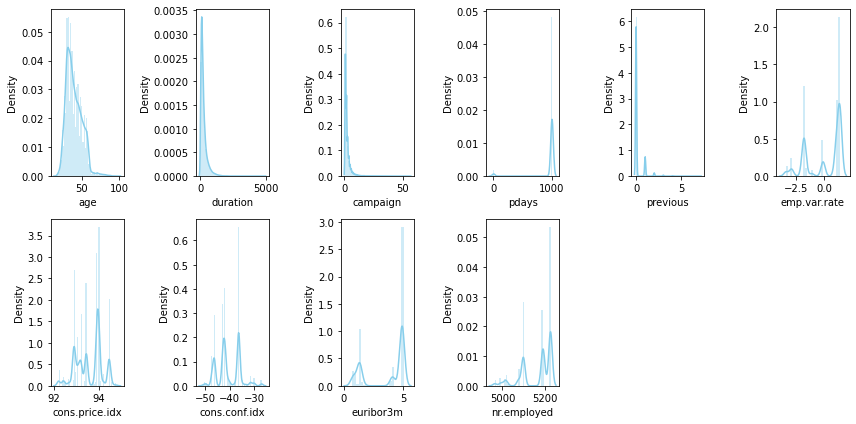

In [17]:
# Check the Distribution of the numerical data, we want to know the distribution shape normal or skewed.
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = list(df2_numerical)
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df2[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

**Most of attributes distribution are skewed** so after we check the outliers (if there are) we will use IQR method because Z-score only can be used when the distribution are normal.

### 2.3 Outlier Management

In [18]:
data = df3.select_dtypes(include = ["int64","float64"])

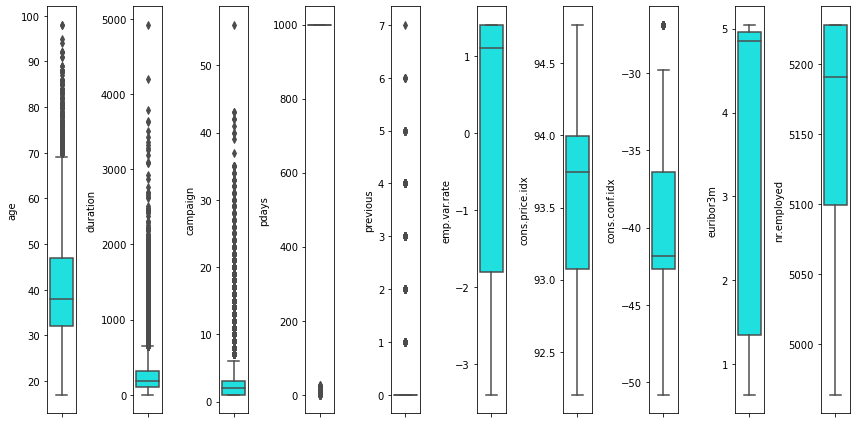

In [19]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = list(data)
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='cyan')
    plt.tight_layout()

It looks like there are outliers in `age`, `duration` and `campaign`. For `age` maybe ***there are some elderly customers that interested in deposit campaign** but not much. For `duration` because it is still in seconds, we will try to convert it to minutes and check again in which range the duration of the outliers. In `campaign` **the majority of number of contacts performed during the campaign with related customers are in range 5-7** but there are special case for some customers that need more consultation for deposit campaign.

Also **IMPORTANT NOTE : `duration` is highly affects the output target. For EDA and Visualization we will use this attribute for analysis but when we proceed to machine learning, we will discarded this attribute because if the `duration` is 0 then it means there are no campaign contacted to them so `y` = 'no' (e.g., if duration=0 then y="no")**. From the description of the dataset there are explanation like this : "Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model".

We will only remove the outliers of `campaign`, for `age` it still acceptable so we will proceed but for `duration` we will drop it when we proceed in machine learning.

### 2.4 Drop outliers in column `campaign`

In [20]:
# Lets take Absence variable as the threshold

# IQR Calculation and its boundary
Q1 = df3["campaign"].quantile(0.25)
Q3 = df3["campaign"].quantile(0.75)
IQR = Q3 - Q1
lower_boundary = Q1 - (1.5 * IQR)
upper_boundary = Q3 + (1.5 * IQR)

# Create filter logic of IQR
filter_logic = (df3["campaign"] >= lower_boundary) & (df3["campaign"] <= upper_boundary)

# Apply the filter
df_iqr_campaign = df3[filter_logic]

Data Dimension before IQR Method: (41188, 21)
Data Dimension after IQR Method: (38782, 20)


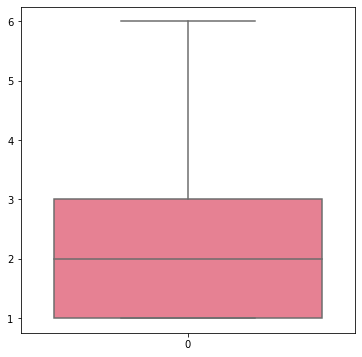

In [21]:
print(f"Data Dimension before IQR Method: {df.shape}")
print(f"Data Dimension after IQR Method: {df_iqr_campaign.shape}")

# Create Boxplot
plt.figure(figsize=(6,6))
sns.boxplot(data=df_iqr_campaign["campaign"],palette="husl")
plt.show()

The dataset shrinked to 38,782 from 41,118, so there are 2,336 outliers from `campaign` were removed or **5.69% of the dataset**.

In [22]:
# Make new copy for filtered dataframe with iqr as df4
df4 = df_iqr_campaign.copy()

In [23]:
df4

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes


## Creating and Transforming Data

Some changes were made to the column name, units and data types for easier analysis.

###  2.5 Change column name of target attribute from 'y' to 'camp_resp'

In [24]:
# Step 1: Change column name : from 'y' to 'camp_resp'
df4.rename(index=str, columns={'y': 'camp_resp'}, inplace = True)

# Make a function to change the value of response from "yes" and "no" to 1 and 0.
def convert(df4, new_column, old_column):
    df4[new_column] = df4[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return df4[new_column].value_counts()

# Apply the function
convert(df4,'camp_resp_binary','camp_resp')

0    34253
1     4529
Name: camp_resp_binary, dtype: int64

In [25]:
df4.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,camp_resp,camp_resp_binary
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0


In [26]:
df4.marital.value_counts()

married     23533
single      10916
divorced     4333
Name: marital, dtype: int64

### 2.6 Change the unit of 'duration' from seconds to minutes

In [27]:
# Step 2 : Change the unit of `duration` from seconds to minutes
# Make a copy of df4 as df5
df5 = df4.copy()

df5['duration'] = df5['duration'].apply(lambda x:x/60).round(2)
df5.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,camp_resp,camp_resp_binary
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0


In [28]:
# Check if the `duration` already convert to minutes
df5.duration.sort_values(ascending=True)

33015     0.00
28063     0.00
6251      0.00
40554     0.02
28239     0.02
         ...  
7727     60.52
13820    60.72
40537    63.08
22192    69.98
24091    81.97
Name: duration, Length: 38782, dtype: float64

From this data we can see that there are customer with duration of contacts performed is 0 minute, it's indicating that the customer were not contacted by the bank's staff so unfortunately their responses for the campaign are 'no' .

### 2.7 Change 'month' values from objects to numbers

In [29]:
df5.month.value_counts()

may    13111
jul     6494
aug     5726
jun     4841
nov     4028
apr     2598
oct      717
sep      562
mar      527
dec      178
Name: month, dtype: int64

It looks like there are no campaign performed in January and February.

In [30]:
# Step 4: Change 'month' from words to numbers for easier analysis
listo = [df5]
for column in listo:
    column.loc[column['month'] == 'mar', 'month_int'] = 3
    column.loc[column['month'] == 'apr', 'month_int'] = 4
    column.loc[column['month'] == 'may', 'month_int'] = 5
    column.loc[column['month'] == 'jun', 'month_int'] = 6
    column.loc[column['month'] == 'jul', 'month_int'] = 7
    column.loc[column['month'] == 'aug', 'month_int'] = 8
    column.loc[column['month'] == 'sep', 'month_int'] = 9
    column.loc[column['month'] == 'oct', 'month_int'] = 10
    column.loc[column['month'] == 'nov', 'month_int'] = 11
    column.loc[column['month'] == 'dec', 'month_int'] = 12


In [31]:
# Check if the new column `month_int` already in or not
df5

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,camp_resp,camp_resp_binary,month_int
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,1,11.0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,0,11.0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,0,11.0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,1,11.0


## Filtering

### 2.8 Drop rows that `duration` column values are <= 5 seconds

In [32]:
# Make new variable for condition under 5 seconds as save it as 'cond_dur'
cond_dur = (df5['duration'] >= 0) & (df5['duration'] <= 5/60) # 5/60 it means 5 seconds divide 60 seconds because we want to filter duration <5 second
df6 = df5.drop(df5[cond_dur].index, axis = 0, inplace =False)

In [33]:
df6

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,camp_resp,camp_resp_binary,month_int
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,1,11.0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,0,11.0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,0,11.0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,1,11.0


Only 48 rows that has `duration` equal or under 5 seconds.

# Part 3. Exploratory Data Analysis <a id="part3"></a>

<img src= 'https://pa-pagaralam.go.id/images/bahan/data-inspect.gif' width='450'>

In [34]:
df6.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,camp_resp,camp_resp_binary,month_int
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0


Features that likely related are :
* 1. Consumer Confidence Index (CCI) and Consumer Price Index (CPI) - Monthly Indicator
* 2. Consumer Price Index(CPI) and Month
* 3. Consumer Confidence Index(CPI) and Month
* 4. Duration and Campaign
* 5. Employment Variation Rate and Number of Employees - Quarterly Indicator

## 3.1 Visualize The Distribution of Age

<AxesSubplot:xlabel='age', ylabel='Count'>

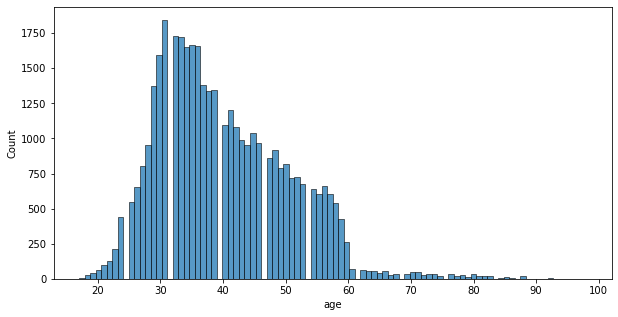

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df6,x='age')

In [36]:
# To check the statistical value(Mean,Median and Standard Deviation)
df6.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,camp_resp_binary,month_int
count,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000
mean,40.018898,4.380143,2.044767,960.673775,0.180410,0.036807,93.561894,-40.498521,3.576788,5165.098572,0.116926,6.613260
std,10.447111,4.323424,1.280567,191.286095,0.504422,1.581581,0.580861,4.681027,1.746207,72.763497,0.321336,2.072765
min,17.000000,0.100000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,3.000000
25%,32.000000,1.780000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000,5.000000
50%,38.000000,3.070000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,0.000000,6.000000
75%,47.000000,5.380000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,8.000000
max,98.000000,81.970000,6.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,12.000000


**The distribution of age:** In this bank's telemarketing campaign, clients called by the bank during campaign have a quite extensive age range, from 17 to 98 years old. However, a majority of clients called is in the range of age of 30s and 40s (32 to 47 years old fall within 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation and mean ~ median(50%)

## 3.2 Visualize the distribution of 'cons.price.idx' and 'cons.conf.idx'

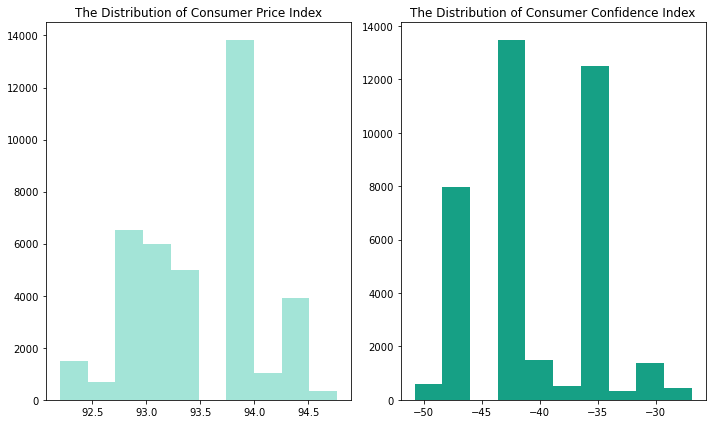

In [37]:
dist_age_ConsPriceIdx = plt.figure(figsize = (10,6))

attr1 = dist_age_ConsPriceIdx.add_subplot(1,2,1)
attr2 = dist_age_ConsPriceIdx.add_subplot(1,2,2)

attr1.hist(df6['cons.price.idx'], color = '#A3E4D7')
attr1.set_title('The Distribution of Consumer Price Index')

attr2.hist(df6['cons.conf.idx'], color = '#16A085')
attr2.set_title('The Distribution of Consumer Confidence Index')

plt.tight_layout()
plt.show()

In [38]:
# To check the statistical value(Mean,Median and Standard Deviation)
df6.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,camp_resp_binary,month_int
count,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000
mean,40.018898,4.380143,2.044767,960.673775,0.180410,0.036807,93.561894,-40.498521,3.576788,5165.098572,0.116926,6.613260
std,10.447111,4.323424,1.280567,191.286095,0.504422,1.581581,0.580861,4.681027,1.746207,72.763497,0.321336,2.072765
min,17.000000,0.100000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,3.000000
25%,32.000000,1.780000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000,5.000000
50%,38.000000,3.070000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,0.000000,6.000000
75%,47.000000,5.380000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,8.000000
max,98.000000,81.970000,6.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,12.000000


**The distribution of Consumer Price Index:** The range of CPI or Consumer Price Index is quite short which is from the lowest 92.20 to the highest is 94.77. The majority of CPI is in range 94 and if we look the distribution of CPI is fairly normal with small standard deviation.

**The distribution of Consumer Confidence Index:** The range of CCI is quite same as CPI which quite short, the range are from the lowest -50.80 to the highest is -26.90. The distribution of CPI is fairly normal like `cons.price.idx` with small standard deviation and mean ~ median(50%). The majority of CCI is in range -42 to -36(-42.7 to -36.4 fall within 25th to 75th percentiles.

## 3.3 Visualize the relationship between 'cons.price.idx' and 'cons.conf.idx'

In [39]:
df6

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,camp_resp,camp_resp_binary,month_int
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,1,11.0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,0,11.0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,0,11.0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,1,11.0


<AxesSubplot:xlabel='cons.price.idx', ylabel='cons.conf.idx'>

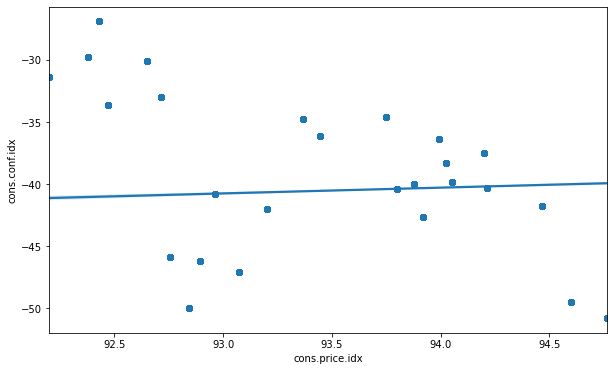

In [40]:
# We trying to figure out the trend by using the lineplot because the range data is short, we can't 
# see the trend if using scatter plot
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(x="cons.price.idx", y="cons.conf.idx", data=df6)

From the graph we can see that the values of CCI(Consumer Confidence Index) are decreasing as the values of CPI(Consumer Price Index) are increasing. Changes in the CPI are used to assess price changes associated with the cost of living while The CCI assumes when consumers are optimistic, they will spend more and stimulate the economy, but if they are pessimistic then their spending patterns could lead to a recession.

References : 
* [What Is the Consumer Price Index (CPI)?](https://www.investopedia.com/terms/c/consumerpriceindex.asp)
* [Understanding the Consumer Confidence Index](https://www.investopedia.com/insights/understanding-consumer-confidence-index/)

## 3.4 Visualize the relationship between 'cons.price.idx' and 'month'

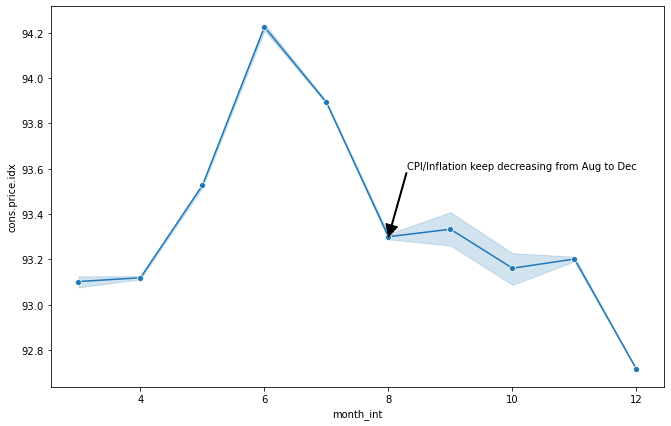

In [41]:
# We are using lineplot because x-axis is time based data.

fig, ax = plt.subplots(figsize=(11,7))

sns.lineplot(x="month_int", y="cons.price.idx",
             data=df6,marker= 'o')

plt.annotate('CPI/Inflation keep decreasing from Aug to Dec',xytext = (8.3,93.6), # 8.3,93.6 mean text is in x=8.3 and y =93.6
             arrowprops=dict(color = 'k', width=1),xy=(8,93.3),) # 8,93.3 mean the arrow is in x=8 and y=93.3

plt.show()

Changes in the CPI reflect price changes in the economy. When there is an upward change in the CPI, this means there has been an increase in the average change in prices over time. This eventually leads to adjustments in the cost of living and income (presumably so that income is adjusted to meet a higher cost of living). Simply, a higher CPI indicates higher inflation while falling CPI indicates lower inflation or deflation.

From the chart we can see that **June is the month that has CPI or inflation is highest in June while the lowest inflation is happening in December**. People who use certificates of deposit (CDs) to store their money safely tend to do so to avoid the risk associated with market-based assets, such as stock and bonds. But long term deposit has harmful risk too which is risk of inflation,If the return on an investment or the interest rate does not at least keep up with the rate of inflation, it will result in the loss of purchasing power over the long term.

Clients or customers maybe tend to put their savings or to deposit when they can predict if the interest rate of deposit can keep up with rate of the inflation. For now we can have some conclusion that **there are chance that client will deposit in August to December when the CPI is not high (Moderate Inflation)**.

References :
* [How CPI Affects Housing and Investments](https://www.thebalance.com/consumer-price-index-cpi-index-definition-and-calculation-3305735)
*  [How Inflation Affects Your Savings Account](https://www.thebalance.com/how-does-inflation-affect-bank-accounts-315771)
* [CDs vs. Inflation: Are They Keeping Up?](https://www.investopedia.com/articles/investing/122215/cds-vs-inflation-are-they-keeping.asp)

## 3.5 Visualize the relationship between 'cons.conf.idx' and 'month'

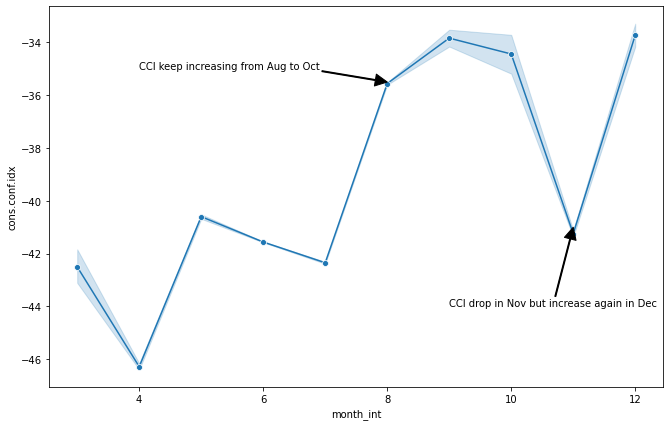

In [42]:
# We are using lineplot because x-axis is time based data.
fig, ax = plt.subplots(figsize=(11,7))

sns.lineplot(x="month_int", y="cons.conf.idx",
             data=df6,marker= 'o')

plt.annotate('CCI keep increasing from Aug to Oct',xytext = (8-4,-35), # 8-4,13 mean text is in x=35 slight left 4 and y =-35
             arrowprops=dict(color = 'k', width=1),xy=(8,-35-0.5),) # 8,-35-0.5 mean the arrow is in x=30 and y=-35 slight left 0.5

plt.annotate('CCI drop in Nov but increase again in Dec ',xytext = (11-2,-41-3), # 11-2,-41-3 mean text is in x=11 slight left 2 and y =-41 sliht left 3
             arrowprops=dict(color = 'k', width=1),xy=(11,-41),) 

plt.show()

Consumer Confidence Index (CCI) is the primary driver of demand in some countries's economy. If people are uncertain about the future, they will buy less and that slows economic growth. When trust in the future is high, people are more willing to shop.

**If confidence increases too much, then people will spend more instead of saving. It creates higher demand that could trigger inflation**. To stop it, **The National Central Bank will raise interest rates**. That slows economic growth. It also increases the value of the national currency. That reduces exports because they are now priced higher in foreign markets. It makes imports cheaper, which also **reduces inflation**.

From the chart we know that **CCI values are high in August to December**, in these period people start to stimulate the economy again by spending more money or investing. **An increased CPI can depress bond prices, too. Fixed-income investments tend to lose value during inflation**. Investors demand higher yields on these investments to make up for the loss in value as a result.


References:
* [What is The Consumer Confidence Index (CCI)?](https://www.thebalance.com/consumer-confidence-index-news-impact-3305743) 

## 3.6 Visualize the distribution of 'duration' and 'campaign'

In [43]:
df6.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,camp_resp,camp_resp_binary,month_int
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0


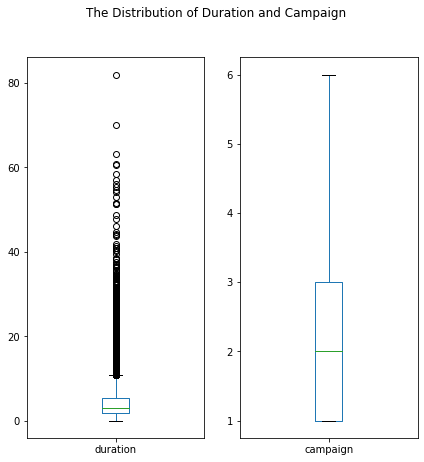

In [44]:
dist_dur_cam = df6[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (7,7),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

In [45]:
# See the duration and campaign part statistical values! (Mean,Median and Standard Deviation)
df6.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,camp_resp_binary,month_int
count,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000
mean,40.018898,4.380143,2.044767,960.673775,0.180410,0.036807,93.561894,-40.498521,3.576788,5165.098572,0.116926,6.613260
std,10.447111,4.323424,1.280567,191.286095,0.504422,1.581581,0.580861,4.681027,1.746207,72.763497,0.321336,2.072765
min,17.000000,0.100000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,3.000000
25%,32.000000,1.780000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000,5.000000
50%,38.000000,3.070000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,0.000000,6.000000
75%,47.000000,5.380000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,8.000000
max,98.000000,81.970000,6.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,12.000000


**The distribution of duration**: as observed from the boxplot, **the duration of contact has a median of 3 minutes, with an interquartile range(25th to 75th) of 1.78 minutes to 5.38 minutes**. The left-skewed or positively skewed boxplot indicates that **most calls of the campaign are relatively short**. Also, there is a large number of outliers ranging from 10 minutes to 40 minutes, which are worth for further study.

**The distribution of campaign**: **About half of the customer have been contacted by the bank during campaign for the second time(from mean and median), while 25% of clients was first introduced to the term deposit**. Most clients have been contacted by the bank for 1 to 3 times, which is still reasonable. However, some clients have been contacted by bank as high as 6 times, which is not normal. Maybe these clients may have some special needs that require frequent contact or consultation related to the campaign.

## 3.7 Visualize the relation between 'duration' and 'campaign'

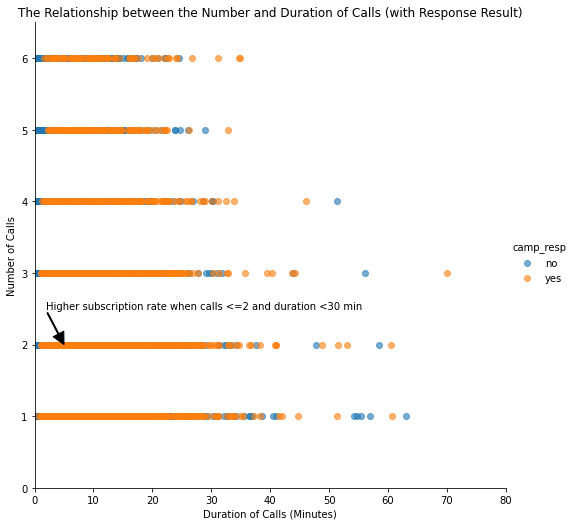

In [46]:
# We will using lmplot instead scatterplot
import seaborn as sns
sns.lmplot(x='duration', y='campaign',data = df6,
                     hue = 'camp_resp',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,80,0,6.5])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
#plt.axhline(y=2, linewidth=2, color="k", linestyle='--') If we want to make line use this
plt.annotate('Higher subscription rate when calls <=2 and duration <30 min',xytext = (2,2+0.5), 
             arrowprops=dict(color = 'k', width=1),xy=(2+3,2)) 
plt.show()

In this scatter plot, clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".

As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after 3 campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 4 times. 

This suggests that the **bank should resist calling a client for more than 3 times, which can be disturbing and increase dissatisfaction**.

In [47]:
df6.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,camp_resp,camp_resp_binary,month_int
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0


## 3.8 Visualize distribution and relation between of 'emp.var.rate' and 'nr.employed'

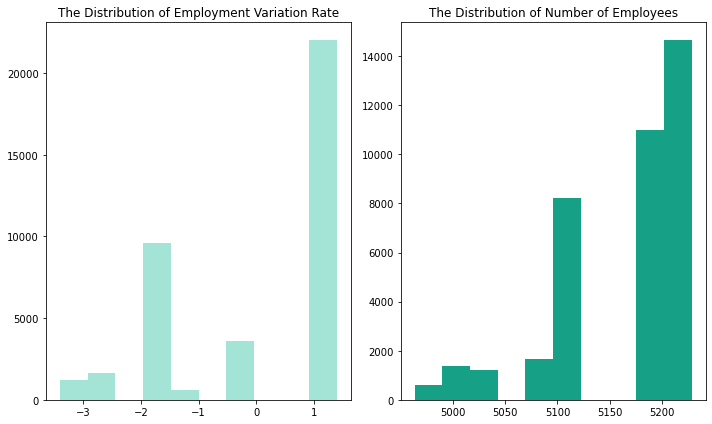

In [48]:
dist_age_ConsPriceIdx = plt.figure(figsize = (10,6))

attr1 = dist_age_ConsPriceIdx.add_subplot(1,2,1)
attr2 = dist_age_ConsPriceIdx.add_subplot(1,2,2)

attr1.hist(df6['emp.var.rate'], color = '#A3E4D7')
attr1.set_title('The Distribution of Employment Variation Rate')

attr2.hist(df6['nr.employed'], color = '#16A085')
attr2.set_title('The Distribution of Number of Employees')

plt.tight_layout()
plt.show()

In [49]:
# We will split the month into 4 quarter 
df7 = df6.copy()

listo1 = [df7]
for column in listo1:
    column.loc[column['month_int'] == 3, 'month_quarter'] = 'first quarter'
    column.loc[column['month_int'] == 4, 'month_quarter'] = 'second quarter'
    column.loc[column['month_int'] == 5, 'month_quarter'] = 'second quarter'
    column.loc[column['month_int'] == 6, 'month_quarter'] = 'second quarter'
    column.loc[column['month_int'] == 7, 'month_quarter'] = 'third quarter'
    column.loc[column['month_int'] == 8, 'month_quarter'] = 'third quarter'
    column.loc[column['month_int'] == 9, 'month_quarter'] = 'third quarter'
    column.loc[column['month_int'] == 10, 'month_quarter'] = 'fourth quarter'
    column.loc[column['month_int'] == 11, 'month_quarter'] = 'fourth quarter'
    column.loc[column['month_int'] == 12, 'month_quarter'] = 'fourth quarter'

In [50]:
df7

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,camp_resp,camp_resp_binary,month_int,month_quarter
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0,second quarter
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0,second quarter
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0,second quarter
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0,second quarter
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0,second quarter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,-1.1,94.767,-50.8,1.028,4963.6,yes,1,11.0,fourth quarter
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,-1.1,94.767,-50.8,1.028,4963.6,no,0,11.0,fourth quarter
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,-1.1,94.767,-50.8,1.028,4963.6,no,0,11.0,fourth quarter
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,-1.1,94.767,-50.8,1.028,4963.6,yes,1,11.0,fourth quarter


<AxesSubplot:xlabel='nr.employed', ylabel='emp.var.rate'>

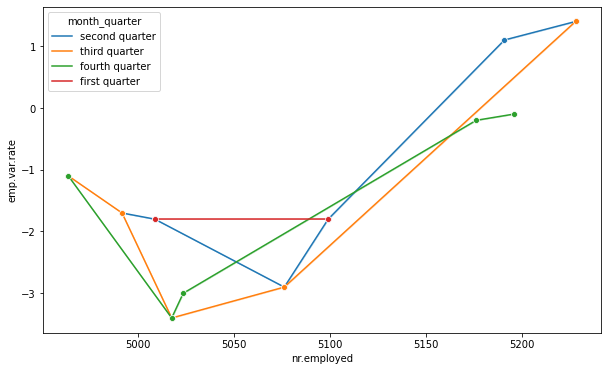

In [51]:
# We trying to figure out the trend by using the lineplot because the range data is short, we can't 
# see the trend if using scatter plot
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(x="nr.employed", y="emp.var.rate",
             data=df7,marker= 'o', hue='month_quarter')

The relationship between inflation and unemployment has traditionally been an inverse correlation. For example :
* In 2001, the mild recession as a result of 9/11 pushed unemployment higher to roughly 6% while inflation fell below 2.5%.
* In the mid-2000s, as unemployment fell, inflation climbed to almost 5% before coming back down in 2006 when unemployment bottomed.
* During the Great Recession, the rate of change of the CPI fell dramatically as unemployment soared to almost 10%.

So, we know that when the employment variation rate high then there are indication of low inflation. Investor tend to deposit their money when the interest rate can keep up the inflation, if we see the chart **the second quarter and third quarter have high employment variation rate**. Meaning **from April to September the inflation is lower** and there are chances that clients will deposit/invest their money and participate in the campaign. But it also indicates that a lot of unemployed clients, when the client is unemployed it is unlikely they will accept the campaign.


References :
* [How Inflation and Unemployment are Related](https://www.investopedia.com/articles/markets/081515/how-inflation-and-unemployment-are-related.asp)
* [Unemployment Rate](https://www.investopedia.com/terms/u/unemploymentrate.asp)




## 3.9 Scatter matrix and Correlation matrix

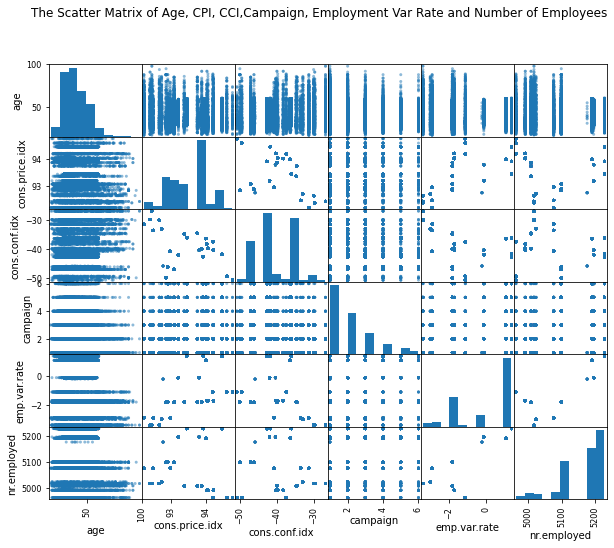

In [52]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(df6[['age','cons.price.idx','cons.conf.idx','campaign','emp.var.rate','nr.employed']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, CPI, CCI,Campaign, Employment Var Rate and Number of Employees')
plt.show()

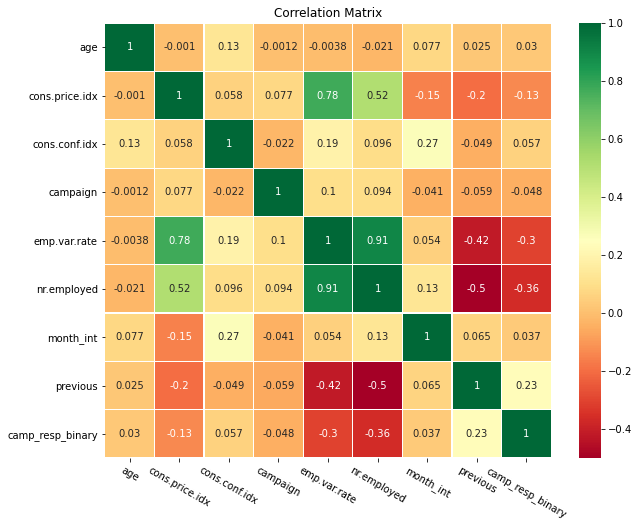

In [53]:
# Make correlation matrix
corr_data = df6[['age','cons.price.idx','cons.conf.idx','campaign','emp.var.rate','nr.employed','month_int','previous','camp_resp_binary']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

`nr.employed` and `emp.var.rate` clearly has high correlation as high **0.91**, `nr.employed` and `cons.conf.idx` also has high correlation which is **0.96**, `nr.employed` and `campaign` also has high correlation with each other as high as **0.94**. We need to be careful of `nr.employed` because this feature/attribute has high correlation with other 3 numerical attributes, when we proceed in machine learning we will check it again with IVF and try to remove this redundant feature.

To investigate more about correlation, a correlation matrix was plotted with all qualitative variables. Clearly, “campaign outcome” has a strong correlation with “previous”, a moderate correlation with “cons.conf.idx”, and mild correlations between  “month of contact” and “age”. Their influences on campaign outcome will be investigated further in the machine learning part. Maybe 

# Part 4. Data Visualization <a id="part4"></a>

With a sound knowledge of the distribution of key variables, further analysis of each customer characteristic can be carried out to investigate its influence on the subscription rate. 

<img src='https://i.pinimg.com/originals/9b/ec/83/9bec831078051d4fc5f06e964da71760.gif' width='500'>

## 4.1 Visualize the subscription and contact rate by age

In [54]:
# We will grouping 'age' with 10 years interval
listo3 = [df6]
for column in listo3:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [55]:
df6.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,camp_resp,camp_resp_binary,month_int,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0,50.0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0,50.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0,30.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0,40.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0,50.0


In [56]:
# Create new table/dataframe to indicate each `age_group` responses with crosstab() method
count_age_response_pct = pd.crosstab(df6['camp_resp'],df6['age_group']).apply(lambda x: x/x.sum() * 100)

# We transpose the dataframe because we want the `responses/YesNO` as column and the crosstab as row
count_age_response_pct = count_age_response_pct.transpose() 
count_age_response_pct

camp_resp,no,yes
age_group,,
20.0,83.096750,16.903250
30.0,89.480951,10.519049
40.0,91.766134,8.233866
50.0,89.563183,10.436817
60.0,59.600348,40.399652


In [57]:
# Make new dataframe of `age` column with fixed age_group, so the age will be in range not like age 41 or 38 just 40 or 30
age = pd.DataFrame(df6['age_group'].value_counts())

# Make new column of percentage age as `% Contacted` as we want to know the percentage of contacted age_group
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()

# Make new column of percentage customer that subscripted or has responses 'yes'
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

# Put the value with matching index
age['age'] = [30,40,50,20,60]

#sort the values, if the values already sorted. You don't need to sort it again.
age = age.sort_values('age',ascending = True)
age

,% Contacted,% Subscription,age
20.0,13.822482,16.903250,20
30.0,41.134404,10.519049,30
40.0,25.522797,8.233866,40
50.0,16.548769,10.436817,50
60.0,2.971550,40.399652,60


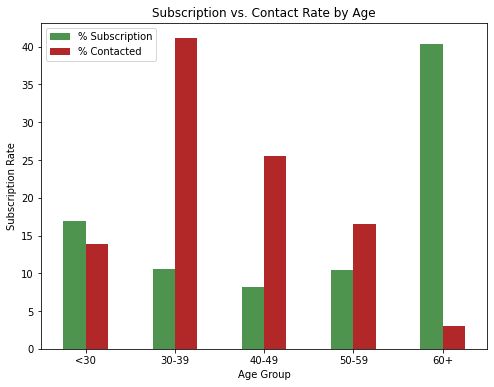

In [58]:
# Visualize the % Subscriptioon and % Contacted by age_group with barplot
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('#4E944F','#B22727'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

**Insights: target young clients and oldest clients instead of middle-aged clients.**

Green vertical bars are indicating that clients with an age of more than 60 or 60+ have the highest subscription rate. About 16.9 or 17% of the campaign subscriptions came from the client between 17 to 29. More than 50% of the campaign subscriptions are contributed by the youngest and the eldest clients.

* It is not surprising to see such patterns because older people's main investment objective is for saving retirement while the middle-age group of clients tend to be more aggresive with a main objective of generating high investment income. Term deposits, as the least risky investment tool, are more preferable by the eldest.

* The young clients may not have enough money or professional knowledged to engage in sophisticated invesments, such as forex, stocks, bonds and mutual funds. Term deposits provide the young clients liquidity and generate interest incomes that are higher than the regular saving account, so term deposits are one of ideal investments for students and young clients under 30.

Nonetheless, red vertical bars in the chart show that the bank mainly focused its telemarketing campaign efforts on the middle-aged group which is between 30-49 years old which returned lower subscription rates than the younger and older groups. Thus, to make the telemarketing campaign more effective, the bank should target the younger and older clients in the next campaign.

## 4.2 Visualize the subscription and contact rate by month

In [59]:
# Make a crosstab dataframe of `month` and `response` by calculate of the `response` mean percentage on `month`
count_month_response_pct = pd.crosstab(df6['camp_resp'],df6['month_int']).apply(lambda x: x/x.sum() * 100)

# Transpose it horizontally
count_month_response_pct = count_month_response_pct.transpose()
count_month_response_pct

camp_resp,no,yes
month_int,,
3.0,48.576850,51.423150
4.0,79.344894,20.655106
5.0,93.365906,6.634094
6.0,88.842975,11.157025
7.0,90.561382,9.438618
8.0,88.952980,11.047020
9.0,53.873874,46.126126
10.0,55.774648,44.225352
11.0,89.739130,10.260870


In [60]:
# Make new dataframe called `month` by using value_counts() of `month_int`
month = pd.DataFrame(df6['month_int'].value_counts())

# Make new column named `% Contacted` by calculate the percentage of mean from `month_int`
month['% Contacted'] = month['month_int']*100/month['month_int'].sum()

# Make new column named `% Subscription` only subscripted customer or has response "yes"
month['% Subscription'] = count_month_response_pct['yes']

# Drop the `month_int` column
month.drop('month_int',axis = 1,inplace = True)

# Add new column of Month by inserting it's value/index
month['Month'] = [5,7,8,6,11,4,10,9,3,12]

# Sort it ascending
month = month.sort_values('Month',ascending = True)
month

,% Contacted,% Subscription,Month
3.0,1.360562,51.423150,3
4.0,6.699540,20.655106,4
5.0,33.817834,6.634094,5
6.0,12.495482,11.157025,6
7.0,16.739815,9.438618,7
8.0,14.769970,11.047020,8
9.0,1.432850,46.126126,9
10.0,1.833015,44.225352,10
11.0,10.391387,10.260870,11
12.0,0.459545,48.314607,12


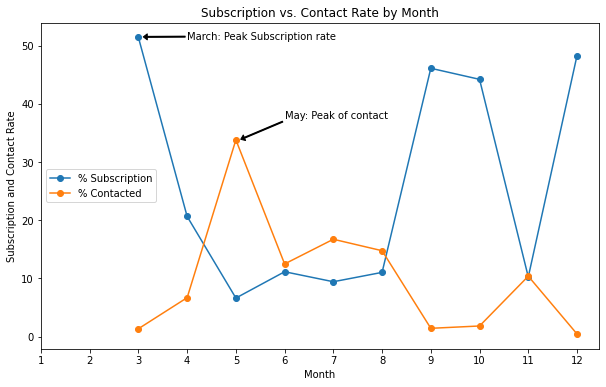

In [61]:
# Visualize it
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

# Put some titles and label for x and y axis
plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+5), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

**Insights: Initiate the telemarketing in fall or spring.**

Besides customer characteristics, external factors may also have an impact on the subscription rate such as seasons and the time of calling. So the month of contact is also analyzed here.

This line chart displays the bank's contact rate in each month as well as client's response rate in each month. One way to evaluate the effectiveness of the bank's marketing plan is to see whether these two lines have a similar trend over the same time horizon.

* The bank **contacted the most clients between May and August**. The highest contact rate is around 33%, which happened in May, while contact rate is closer to 0 in March, September, October and December.

* Nonetheless, the subscription rate showed a different trend. **the highest subscription rate occured in March**, which is over 50% and all subscription rates in **September, October and December** are over 40%. 

Clearly, **these two lines move in different directions which strongly indicates the inappropriate thing of the bank's telemarketing campaign**. To enhance the marketing campaign, the bank should consider initiating the telemarketing campaign in fall and spring when the subscription rate tends to be higher.

However, the bank should be cautious when analyzing external factors. More data from previous marketing campaign should be collected and analyzed to make sure that this seasonal effect is constant over time and applicable to the future.

## 4.3 Visualize the subscription rate by job

In [62]:
# Make a crosstab dataframe of `job` and `response` by calculate of the `response` mean percentage on `job`
count_job_response_pct = pd.crosstab(df6['camp_resp'],df6['job']).apply(lambda x: x/x.sum() * 100)

# Transpose it so we get the `response` as column 
count_job_response_pct = count_job_response_pct.transpose()

# Show the crosstab
count_job_response_pct 

camp_resp,no,yes
job,,
admin.,86.605814,13.394186
blue-collar,92.876807,7.123193
entrepreneur,91.187181,8.812819
housemaid,89.249493,10.750507
management,88.514493,11.485507
retired,74.051408,25.948592
self-employed,89.030804,10.969196
services,91.539491,8.460509
student,67.532468,32.467532


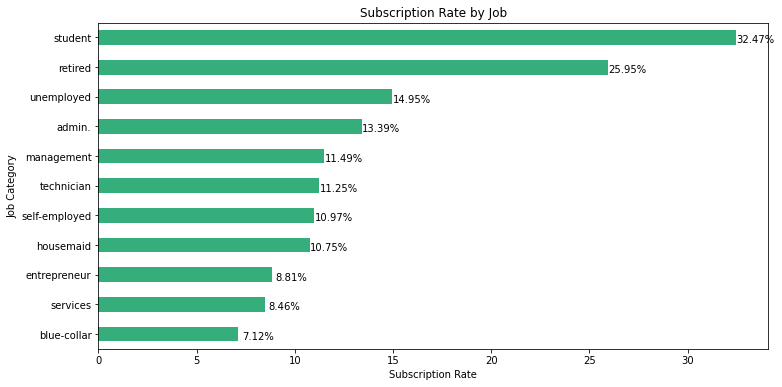

In [63]:
# Visualize it.
# Make a plot of only subscripted customer or has response "yes"
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6),color='#36AE7C')
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(2).astype(str)):
    plot_job.text(rec.get_width()+1, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

**Insights: target students and retired clients**

As noted from the horizontal bar chart, students and retired clients account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older. 

# Part 5. Machine Learning <a id="part5"></a>

<img src='https://algotech.netlify.com/img/image_class/train.gif' width='500'>

##  Prepare data for classification

In [66]:
df6.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,camp_resp,camp_resp_binary,month_int,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0,50.0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0,50.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0,30.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0,40.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1.1,93.994,-36.4,4.857,5191.0,no,0,5.0,50.0


### 5.1 Drop features that doubled/duplicated after EDA/Visualization

In [67]:
# Step 1 : Delete 'month','camp_resp' and 'age_group' because we already have the binary feature.
# Step 2 : Delete the 'contact' column because it doesn't important. 'contact' values are : cellular or telephone
# Step 3 : Delete 'marital' because it may bias

df7 = df6.drop(['month','camp_resp','age_group','contact','marital'],axis=1)

### 5.2 Select features relevant to clients

Only the most relevant customer information is considered, which includes job title, education, age, default record, housing record and loan record. Also we will include the socio economic factor because it may affect the customer to accept the campaign or not. Other information, such as ‘the number of contacts performed before this campaign’, is omitted because it is not directly related to customers themselves.

In [68]:
# Make a copy of df7 as dataset,  we will separate the dataframe name for machine learning to make it easier to remember
dataset = df7.copy()

# Using loc() to filter the features related to clinets, use iloc if want  to filter using index
dataset1 = dataset.loc[:,['age','emp.var.rate','nr.employed','cons.price.idx','cons.conf.idx','euribor3m','job','loan','education','default','housing']]

dataset1.head()

,age,emp.var.rate,nr.employed,cons.price.idx,cons.conf.idx,euribor3m,job,loan,education,default,housing
0,56,1.1,5191.0,93.994,-36.4,4.857,housemaid,no,basic.4y,no,no
1,57,1.1,5191.0,93.994,-36.4,4.857,services,no,high.school,no,no
2,37,1.1,5191.0,93.994,-36.4,4.857,services,no,high.school,no,yes
3,40,1.1,5191.0,93.994,-36.4,4.857,admin.,no,basic.6y,no,no
4,56,1.1,5191.0,93.994,-36.4,4.857,services,yes,high.school,no,no


### 5.3 Transform categorical data into dummy variables

Since machine learning algorithms only take numerical values, all five categorical variables (job, education, default, housing and loan) are transformed into dummy variables.

Dummy variables were used instead of continuous integers because these categorical variables are not ordinal. They simply represent different types rather than levels, so dummy variables are ideal to distinguish the effect of different categories. 

In [69]:
# Check the best encoding for each columns
feature_labelencoding = []
feature_onehot = []
feature_binary = []

df_categorical = dataset1.select_dtypes(exclude =['int64','float64'])

# Iteration
for i in df_categorical.columns:
    # make new variable called 'test_loop' as looping logic
    test_loop = df_categorical[i].unique().tolist()
    # For column with 2 unique values will be input into a variable called 'feature_labelenoding' 
    if len(test_loop) == 2:
        print(f"{i} is Dichotomous: Yes or No. Strategy: Label Encoder")
        feature_labelencoding.append(i)
    # For column with 3-6 unique values will be input into a variable called 'feature_onehot'    
    elif 2 < len(test_loop) < 6:
        print(f"{i} has 3 - 6 unique values. Strategy: One-hot Encoding")
        feature_onehot.append(i)
    # For column with more than 6 unique values will be input into a variable called 'feature_binary'  
    elif len(test_loop) > 6:
        print(f"{i} has > 6 unique values. Strategy: Binary Encoding")
        feature_binary.append(i)
    # Logic if only 1 unique value 
    else:
        print(f"{i} is Other")

job has > 6 unique values. Strategy: Binary Encoding
loan is Dichotomous: Yes or No. Strategy: Label Encoder
education has > 6 unique values. Strategy: Binary Encoding
default is Dichotomous: Yes or No. Strategy: Label Encoder
housing is Dichotomous: Yes or No. Strategy: Label Encoder


**Notes: we don't know if `education` has a level or not and whether it affects target significantly or not**, so we don't do ordinal-encoding to it. Instead we will do binary encoding for both `education` and `job`.

In [70]:
# make a copy of dataset1 named 'dataset2' for encoding preparation
dataset2 = dataset1.copy()

In [71]:
# Apply category_encoders for Binary encoding
import category_encoders as ce

# Apply BinaryEncoder to 'job'
encoder_bin = ce.BinaryEncoder(cols=['job'])
df_bin_job = encoder_bin.fit_transform(dataset2['job'])
# Concat the encoded 'job' to dataset2
dataset2 = pd.concat([dataset2,df_bin_job],axis=1)

# Apply Ordinal Encoding to 'education'
education_class = {"illiterate": 0,
                   "basic.4y": 1,
                   "basic.6y": 2,
                  "basic.9y": 3,
                  "high.school": 4,
                  "university.degree": 5,
                  "professional.course": 6}

dataset2['education']=dataset2['education'].map(education_class)

# Appy lambda for label-encoding
dataset2['housing'] = dataset2['housing'].apply(lambda x: 1 if x == 'yes' else 0)
dataset2['default'] = dataset2['default'].apply(lambda x: 1 if x == 'yes' else 0)
dataset2['loan'] = dataset1['loan'].apply(lambda x: 1 if x == 'yes' else 0)

# Make data frame with only target variables as column
dataset_response = pd.DataFrame(dataset['camp_resp_binary'])

#Merge the dataset with encoded dataframe
dataset2 = pd.merge(dataset2, dataset_response, left_index = True, right_index = True)
dataset2

,age,emp.var.rate,nr.employed,cons.price.idx,cons.conf.idx,euribor3m,job,loan,education,default,housing,job_0,job_1,job_2,job_3,camp_resp_binary
0,56,1.1,5191.0,93.994,-36.4,4.857,housemaid,0,1,0,0,0,0,0,1,0
1,57,1.1,5191.0,93.994,-36.4,4.857,services,0,4,0,0,0,0,1,0,0
2,37,1.1,5191.0,93.994,-36.4,4.857,services,0,4,0,1,0,0,1,0,0
3,40,1.1,5191.0,93.994,-36.4,4.857,admin.,0,2,0,0,0,0,1,1,0
4,56,1.1,5191.0,93.994,-36.4,4.857,services,1,4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,-1.1,4963.6,94.767,-50.8,1.028,retired,0,6,0,1,0,1,1,0,1
41184,46,-1.1,4963.6,94.767,-50.8,1.028,blue-collar,0,6,0,0,0,1,0,0,0
41185,56,-1.1,4963.6,94.767,-50.8,1.028,retired,0,5,0,1,0,1,1,0,0
41186,44,-1.1,4963.6,94.767,-50.8,1.028,technician,0,6,0,0,0,1,0,1,1


In [72]:
# Delete the duplicated features such as 'job' and 'education' after Binary-Encoding
dataset3 = dataset2.drop(['job'],axis=1)

In [73]:
dataset3

,age,emp.var.rate,nr.employed,cons.price.idx,cons.conf.idx,euribor3m,loan,education,default,housing,job_0,job_1,job_2,job_3,camp_resp_binary
0,56,1.1,5191.0,93.994,-36.4,4.857,0,1,0,0,0,0,0,1,0
1,57,1.1,5191.0,93.994,-36.4,4.857,0,4,0,0,0,0,1,0,0
2,37,1.1,5191.0,93.994,-36.4,4.857,0,4,0,1,0,0,1,0,0
3,40,1.1,5191.0,93.994,-36.4,4.857,0,2,0,0,0,0,1,1,0
4,56,1.1,5191.0,93.994,-36.4,4.857,1,4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,-1.1,4963.6,94.767,-50.8,1.028,0,6,0,1,0,1,1,0,1
41184,46,-1.1,4963.6,94.767,-50.8,1.028,0,6,0,0,0,1,0,0,0
41185,56,-1.1,4963.6,94.767,-50.8,1.028,0,5,0,1,0,1,1,0,0
41186,44,-1.1,4963.6,94.767,-50.8,1.028,0,6,0,0,0,1,0,1,1


### 5.4 Transformation - Scaling Data

**Because the numerical datas distribution are quite normal so we use standardization**

In [74]:
# Scaling the `emp.var.rate`, `nr.employed`, `cons.price.idx`, `cons.conf.idx` and `euribor3m`
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

dataset3['emp.var.rate'] = std_scaler.fit_transform(dataset3['emp.var.rate'].values.reshape(len(dataset3),1))
dataset3['nr.employed'] = std_scaler.fit_transform(dataset3['nr.employed'].values.reshape(len(dataset3),1))
dataset3['cons.price.idx'] = std_scaler.fit_transform(dataset3['cons.price.idx'].values.reshape(len(dataset3),1))
dataset3['cons.conf.idx'] = std_scaler.fit_transform(dataset3['cons.conf.idx'].values.reshape(len(dataset3),1))
dataset3['euribor3m'] = std_scaler.fit_transform(dataset3['euribor3m'].values.reshape(len(dataset3),1))
dataset3['age'] = std_scaler.fit_transform(dataset3['age'].values.reshape(len(dataset3),1))



In [75]:
# Show the transformed dataset
dataset3

,age,emp.var.rate,nr.employed,cons.price.idx,cons.conf.idx,euribor3m,loan,education,default,housing,job_0,job_1,job_2,job_3,camp_resp_binary
0,1.529735,0.672243,0.355972,0.743915,0.875572,0.733148,0,1,0,0,0,0,0,1,0
1,1.625456,0.672243,0.355972,0.743915,0.875572,0.733148,0,4,0,0,0,0,1,0,0
2,-0.288973,0.672243,0.355972,0.743915,0.875572,0.733148,0,4,0,1,0,0,1,0,0
3,-0.001809,0.672243,0.355972,0.743915,0.875572,0.733148,0,2,0,0,0,0,1,1,0
4,1.529735,0.672243,0.355972,0.743915,0.875572,0.733148,1,4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.157000,-0.718789,-2.769262,2.074715,-2.200716,-1.459633,0,6,0,1,0,1,1,0,1
41184,0.572520,-0.718789,-2.769262,2.074715,-2.200716,-1.459633,0,6,0,0,0,1,0,0,0
41185,1.529735,-0.718789,-2.769262,2.074715,-2.200716,-1.459633,0,5,0,1,0,1,1,0,0
41186,0.381077,-0.718789,-2.769262,2.074715,-2.200716,-1.459633,0,6,0,0,0,1,0,1,1


### 5.5 Handling Multicollinearity

In EDA section we know that on correlation matrix, `nr.employed` has high correlation with 3 other attributes which are `emp.var.rate`, `cons.conf.idx` and `campaign`. But because we don't include `campaign` in the dataset relevant to customers we will just check the multicollinearity features with IVF.

**IMPORTANT NOTE: Make sure there are no strings in dataframe or make sure do IVF checking after all categorical attributes are encoded**.

In [76]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [77]:
X = dataset3.iloc[:,:-1]
calc_vif(X)
# If VIF > 5 then we need to remove those features

,variables,VIF
0,age,1.106376
1,emp.var.rate,33.308653
2,nr.employed,31.178411
3,cons.price.idx,6.564398
4,cons.conf.idx,2.620739
5,euribor3m,63.699383
6,loan,1.171278
7,education,8.468120
8,default,1.000474
9,housing,2.088618


In [78]:
# We will remove 'TotalCharges' because it's VIF value is more than 5
dataset4 = dataset3.drop(['nr.employed','emp.var.rate','education'],axis = 1)
dataset4

,age,cons.price.idx,cons.conf.idx,euribor3m,loan,default,housing,job_0,job_1,job_2,job_3,camp_resp_binary
0,1.529735,0.743915,0.875572,0.733148,0,0,0,0,0,0,1,0
1,1.625456,0.743915,0.875572,0.733148,0,0,0,0,0,1,0,0
2,-0.288973,0.743915,0.875572,0.733148,0,0,1,0,0,1,0,0
3,-0.001809,0.743915,0.875572,0.733148,0,0,0,0,0,1,1,0
4,1.529735,0.743915,0.875572,0.733148,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.157000,2.074715,-2.200716,-1.459633,0,0,1,0,1,1,0,1
41184,0.572520,2.074715,-2.200716,-1.459633,0,0,0,0,1,0,0,0
41185,1.529735,2.074715,-2.200716,-1.459633,0,0,1,0,1,1,0,0
41186,0.381077,2.074715,-2.200716,-1.459633,0,0,0,0,1,0,1,1


In [79]:
X = dataset4.iloc[:,:-1]
calc_vif(X)
# If VIF > 5 then we need to remove those features

,variables,VIF
0,age,1.076664
1,cons.price.idx,1.972285
2,cons.conf.idx,1.152640
3,euribor3m,2.132998
4,loan,1.167426
5,default,1.000336
6,housing,2.021460
7,job_0,1.129707
8,job_1,1.616715
9,job_2,1.998033


### 5.6 Feature selection

The values of the first 11 columns, which contain customer statistics, are selected as features while the value of the last column, 'campaign outcome', is set as target. 

In [80]:
# Make array values and put the features and target as X-Array and y-Array
array = dataset4.values

# Features : first 11 columns
X = array[:,0:-1]

# Target variable: 'camp_resp_binary'
y = array[:-1]


### 5.7 Check if data is balanced or unbalanced

<AxesSubplot:>

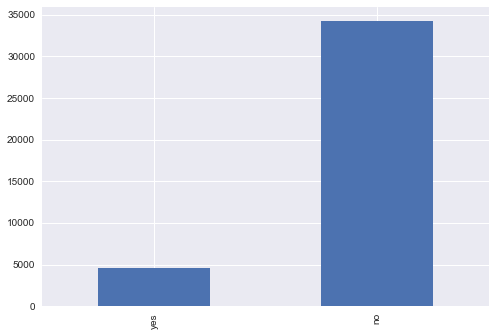

In [122]:
df6['camp_resp'].value_counts(ascending=True).plot(kind='bar')

In [81]:
dataset4['camp_resp_binary'].value_counts().reset_index()

,index,camp_resp_binary
0,0,34205
1,1,4529


In [82]:
# Make new dataframe called 'target' to find out the percentage of client's response to campaign
target = dataset4['camp_resp_binary'].value_counts().reset_index()
# Rename the 'index' column into 'camp_resp_binary' and 'camp_resp_binary' into 'freq'
target.rename(columns={'index':'camp_resp_binary','camp_resp_binary':'freq'}, inplace=True)
# Add new column as percentage of frequency
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,camp_resp_binary,freq,percentage
0,0,34205,88.31
1,1,4529,11.69


**the data is really imbalanced!!** because the percentage of clients that didn't 
accept campaign are more than clients that accepted the campaign.

### 5.8 Balance the data with Oversampling with SMOTE

**Notes : We will do Oversampling with Smote only for Training Data only, not the test data.**

In [83]:
from imblearn import under_sampling, over_sampling

X = dataset4.drop(['camp_resp_binary'], axis=1)
y = dataset4['camp_resp_binary']

### 5.9 Train/Test split

Split the data :

In [84]:
from sklearn.model_selection import train_test_split

# 20% of the data will be used for testing
# We won't used random state in this project
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=seed)

 Create oversampling of X_train and y_train :

In [85]:
# We will do Oversampling with smote because the amount of data are not much
# Oversampling with smote
X_train_smote, y_train_smote = over_sampling.SMOTE(random_state=7).fit_resample(X_train,y_train)

In [86]:
# Concat the oversampling X and y
df_train_smote = pd.concat([X_train_smote, y_train_smote], axis=1)
df_train_smote.head(3)

,age,cons.price.idx,cons.conf.idx,euribor3m,loan,default,housing,job_0,job_1,job_2,job_3,camp_resp_binary
0,1.338292,0.613073,-0.470304,0.793279,0,0,1,0,1,1,0,0
1,-0.863302,-1.151572,-1.218013,-1.288402,0,0,1,0,1,0,0,0
2,-0.097530,-0.838240,-1.410281,-1.266641,0,0,1,0,1,0,1,1


In [87]:
df_train_smote['camp_resp_binary'].value_counts()

0    23951
1    23951
Name: camp_resp_binary, dtype: int64

**Data already balanced!**.

In [88]:
# 20% of the data will be used for testing
# We won't used random state in this project
#seed = 7
#X_train, X_test, y_train, y_test = train_test_split(X_over_smote, y_over_smote, test_size=0.20,random_state=seed)

## Compare Classification Algorithm

5 different classification algorithms (Logistic Regression, K-Neighbors Classifier, Decision Tree Classifier,Gaussian NB and Random Forest Clasiffier) are run on the dataset and the best-performing one will be used to build the classification model.  

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [90]:
# Import the classifier packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [91]:
# Make new list to put models and it's accuracy
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

**Notes : Because we want to minimalize the FALSE POSITIVE as much as possible** (We don't want the models predict the clients that actually didn't accept campaign predicted as clients that accepted the campaign). So we are using **PRECISION**.

In [92]:
# Make new list 
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, shuffle=True, random_state = seed)    
    # train the model
    cv_results = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='precision')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.716473 (0.008295)
KNN: 0.828440 (0.007218)
CART: 0.910975 (0.004245)
NB: 0.522284 (0.067396)
RF: 0.901813 (0.005761)


<function matplotlib.pyplot.show(close=None, block=None)>

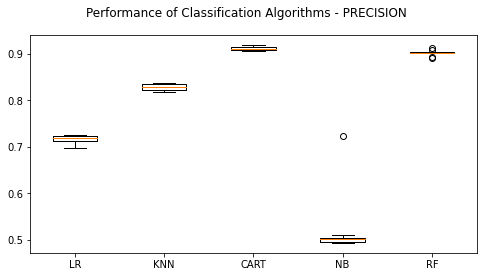

In [93]:
fig = plt.figure(figsize = (8,4))
fig.suptitle('Performance of Classification Algorithms - PRECISION')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show

By using K-Fold cross validation, for now we know that Random Forest and Decision Tree are the highest PRECISION with 90% and Decision Tree with 91% Precision. But we will also try using Random Forest,KNN and Logistic Regression for final modelling, maybe we can increase the PRECISION by doing Hyperparameter Tuning with GridSearchCV.

## Hyperparameter Tuning ~ Logistic Regression

In [94]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [98]:
%%time
# define models and parameters
model_logreg = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=7)
grid_search_logreg = GridSearchCV(estimator=model_logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='precision',error_score=0)
grid_result_logreg = grid_search_logreg.fit(X_train_smote, y_train_smote) # Change this with smote data if imbalanced

Wall time: 38.5 s


In [99]:
# summarize results
print("Best: %f using %s" % (grid_result_logreg.best_score_, grid_result_logreg.best_params_))
means = grid_result_logreg.cv_results_['mean_test_score']
stds = grid_result_logreg.cv_results_['std_test_score']
params = grid_result_logreg.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.716474 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.716474 (0.005990) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.716474 (0.005990) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.716474 (0.005990) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.716474 (0.005990) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.716474 (0.005990) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.716474 (0.005990) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.716447 (0.005968) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.716447 (0.005968) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.716437 (0.005948) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.716347 (0.005921) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.716347 (0.005921) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.716309 (0.005889) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.715073 (0.005749) wit

By doing hyperparameter tuning on Logistic Regression the Precision **not changed a lot, from still in71.8% Precision**. With best tuning - **Best: 0.716474 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}**

## Hyperparameter Tuning ~ K-Nearest Neighbor

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
%%time
# define models and parameters
model_knn = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='precision',error_score=0)
grid_result_knn = grid_search_knn.fit(X_train_smote, y_train_smote) # Change this with smote data if imbalanced

Wall time: 8min 16s


In [102]:
# summarize results
print("Best: %f using %s" % (grid_result_knn.best_score_, grid_result_knn.best_params_))
means = grid_result_knn.cv_results_['mean_test_score']
stds = grid_result_knn.cv_results_['std_test_score']
params = grid_result_knn.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.883789 using {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.867834 (0.005835) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.867834 (0.005835) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.851740 (0.007657) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.878054 (0.006661) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.828896 (0.007674) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.873350 (0.005926) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.813136 (0.007695) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.869767 (0.005990) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.800418 (0.007090) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.866836 (0.005916) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.793458 

By doing hyperparameter tuning for K-Nearest Neighbor we can **increase a bit the precision by 6% from 82% to 88%**. with best tuning - **(Best: 0.883789 using {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'})**

## Hyperparameter Tuning ~ Random Forest

In [103]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

#seed = 7
model_rf = RandomForestClassifier()

In [104]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop =300, num =15)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
             'max_depth' : max_depth,
             'min_samples_split' : min_samples_split,
             'min_samples_leaf' : min_samples_leaf,
             'bootstrap' : bootstrap}

print(param_grid)

{'n_estimators': [10, 30, 51, 72, 92, 113, 134, 155, 175, 196, 217, 237, 258, 279, 300], 'max_features': ['auto'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [105]:
%%time
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search_rf = GridSearchCV(estimator = model_rf, param_grid = param_grid, cv=3, verbose= -2,n_jobs=4,scoring='precision',error_score=0)
grid_result_rf = grid_search_rf.fit(X_train_smote, y_train_smote)

Wall time: 8min 28s


In [107]:
# summarize results
print("Best: %f using %s" % (grid_result_rf.best_score_, grid_result_rf.best_params_))
means = grid_result_rf.cv_results_['mean_test_score']
stds = grid_result_rf.cv_results_['std_test_score']
params = grid_result_rf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.799278 using {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 51}
0.779109 (0.018292) with: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
0.779010 (0.045426) with: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
0.778098 (0.025034) with: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 51}
0.775789 (0.030528) with: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 72}
0.757206 (0.032412) with: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 92}
0.773514 (0.043507) with: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', '

By doing hyperparameter tuning on Random forest, **the precision decreased quite significant like by 10% from from 90% to 79.9% or 80%** with best tuning below : 
* Best: 0.799278 using {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 51}

## Evaluate K-Nearest Neighbor Model

We will using Tuned KNN model because this model has highest precision as high as 88%, while Tuned-Logistic Regression model has 71.8% and Tuned-Random Forest model has 82% precision. 

In [88]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(metric='manhattan',n_neighbors=3, weights='distance')
KNN.fit(X_train_smote,y_train_smote)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [89]:
y_pred_knn = KNN.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Precision Score 
print(precision_score(y_test, y_pred_knn))

0.33997429305912596


The model's precision is quite low which is 33.99% or 34% but we will see the confusion matrix. **Remember the data is highly unbalanced!**.

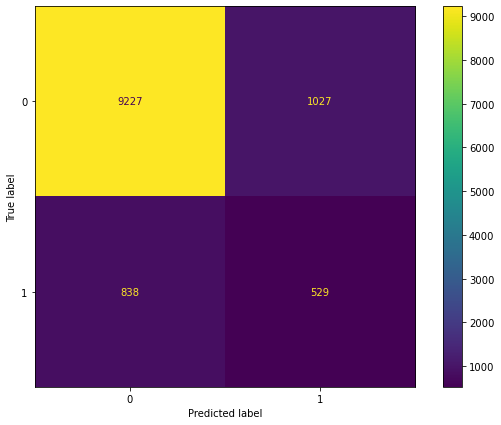

In [91]:
# the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

Precision is simply the ratio of correct positive predictions out of all positive predictions made, or the accuracy of minority class predictions. **The KNN algorithm achieves an precision of 34%, suggesting low 
level of strength of this model to classify the customer response given all the defined customer features**.

**Nonetheless, the result of accuracy score can possibly yield misleading result if the data set is unbalanced, because the number of observations in different classes largely vary.** So we don't use ACCURACY in this project, instead we use PRECISION. 

It turns out that when the model was tested with test_data the model is overfitting. Both the precision and recall for "positive" response are low, so we this KNN model is not good.

In [92]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     10254
           1       0.34      0.39      0.36      1367

    accuracy                           0.84     11621
   macro avg       0.63      0.64      0.64     11621
weighted avg       0.85      0.84      0.84     11621



## Evaluate Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(C=100,penalty='l2',solver='newton-cg')
LogReg.fit(X_train_smote,y_train_smote)

LogisticRegression(C=100, solver='newton-cg')

In [94]:
y_pred_logreg = LogReg.predict(X_test)

In [95]:
# Precision Score 
print(precision_score(y_test, y_pred_logreg))

0.24961360123647605


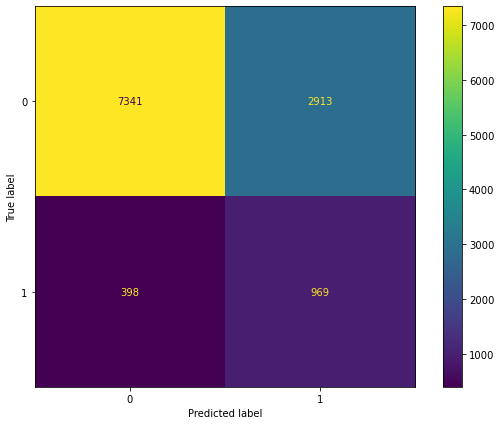

In [96]:
# the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

A confusion matrix gives a detailed breakdown of prediction result and error types. Each cell in the matrix represents a combination of instances of the predicted response and the actual response. In the test set, the matrix proves that the algorithm performed quite not well because most test results (969 True Positive predictions) locate on the beside cells which represent correct predictions. 2913 tests (False positive) predicted the bank’s client would subscribe to the term deposit but they actually did not. 

**A problem revealed by this confusion matrix is that the dataset is highly unbalanced, with nearly all client actually decline to subscribe.** 

In [97]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     10254
           1       0.25      0.71      0.37      1367

    accuracy                           0.72     11621
   macro avg       0.60      0.71      0.59     11621
weighted avg       0.87      0.72      0.76     11621



The recall from tuned-logistic regression is better which is 71% than KNN(38%) but the but the PRECISION is lower than KNN  because we prioritize the PRECISION over Recall in this project **(We don't want the model predict the customer as customer that accepted campaign but actually not)** or high FALSE POSITIVE. So we better check if the PRECISION of Tuned-Random Forest better than this model(LR).

## Evalute Random Forest Model

In [98]:
from sklearn.ensemble import RandomForestClassifier
RF_class =RandomForestClassifier(bootstrap = True,max_depth=4,max_features='auto',min_samples_leaf=2,min_samples_split=2,n_estimators=51)
RF_class.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=51)

In [99]:
y_pred_rf_class = RF_class.predict(X_test)

In [100]:
# Precision Score 
print(precision_score(y_test, y_pred_rf_class))

0.3264790764790765


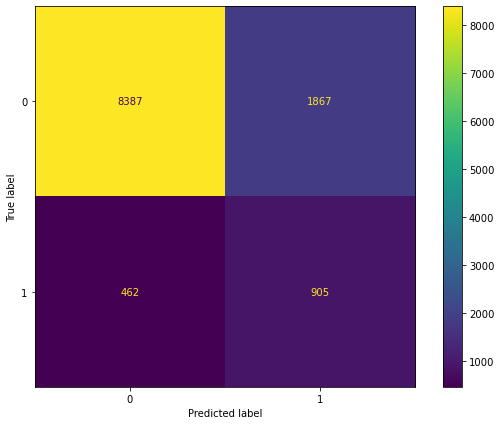

In [101]:
# the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test, y_pred_rf_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

In [102]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf_class))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     10254
           1       0.33      0.66      0.44      1367

    accuracy                           0.80     11621
   macro avg       0.64      0.74      0.66     11621
weighted avg       0.87      0.80      0.83     11621



Classification report shows the precision, recall, F1 and support scores for the RF classification model. 
* Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 95%. 
* Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 81% correctly that they would decline the offer. 

* Precision of 1 (the client said yes) represents that for all instances predicted as yes subscription, the percentage of clients that actually said yes is 32%. 
* Recall is the ability of a classifier to find all positive instances. Recall of 1 indicates that for all clients that actually said yes, the model predicts 67% correctly that they would accept the offer. 

In general, the report shows that **RF model has great predictive power to identify the customers who would not subscribe to the term deposit**. Because of the limited number of clients accepting the term deposit. In this case we aim for high PRECISION and the highest precision is 37%, we may need to find other models or using new dataset with more balanced ratio. 

Even though we already done oversampling with SMOTE for X_train and y_train, the model still predicted poorly on test dataset. **F-1 Score can be considered as good metrics because we need high PRECISION but the data is imbalanced, so we take the Random Forest Model with F-1 score of 44%.**

**NOTES : Customer that decline the campaign are 88.31% while customer that accept the campaign are 11.69% of the dataset.**

## Evaluate THE AUC-ROC

NOTE : Actually THE AUC-ROC is used when the dataset is balanced but we will try to compare the AUC-ROC and Precision-Recall AUC.

In [103]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = LogReg.predict_proba(X_test)
knn_probs = KNN.predict_proba(X_test)
rf_probs = RF_class.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
knn_probs = knn_probs[:, 1]
rf_probs = rf_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [104]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Logistic: ROC AUC=%.3f' % (knn_auc))
print('Logistic: ROC AUC=%.3f' % (rf_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.749
Logistic: ROC AUC=0.688
Logistic: ROC AUC=0.788


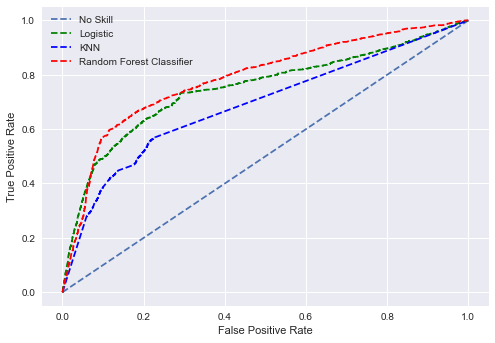

In [105]:
plt.style.use('seaborn')

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr,linestyle='--', label='Logistic',color='green')
plt.plot(knn_fpr, knn_tpr,linestyle='--', label='KNN',color='blue')
plt.plot(rf_fpr, rf_tpr,linestyle='--', label='Random Forest Classifier',color='red')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

It is evident from the plot that the **AUC for the Random Forest ROC curve is higher than over the KNN ROC curve or Logistic Regression ROC Curve**. Therefore, we can say that Random Forest did a better job of classifying the positive class in the dataset. Also because the AUC score of random forest is 0.78 we can consider that the random forest model quite good in ROC-AUC.

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. **It tells how much the model is capable of distinguishing between classes**. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between client who accepted campaign and client who decline the campaign.

We just want to check the AUC-ROC, but because we have imbalanced dataset we will use Precision-Recall Curves instead AUC-ROC.

References :
* [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

## Evaluate Precision - Recall Curve (PR-AUC)

In [106]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [107]:
# predict probabilities
logreg_probs = LogReg.predict_proba(X_test)
KNN_probs = KNN.predict_proba(X_test)
RF_class_probs = RF_class.predict_proba(X_test)

# keep probabilities for the positive outcome only
logreg_probs = logreg_probs[:, 1]
KNN_probs = KNN_probs[:, 1]
RF_class_probs = RF_class_probs[:, 1]

# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, logreg_probs)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, KNN_probs)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, RF_class_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, y_pred_logreg), auc(lr_recall, lr_precision)
knn_f1, knn_auc = f1_score(y_test, y_pred_knn), auc(knn_recall, knn_precision)
rf_f1, rf_auc = f1_score(y_test, y_pred_rf_class), auc(rf_recall, rf_precision)

In [108]:
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('KNN: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))
print('RF_Classifier: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))

Logistic: f1=0.369 auc=0.361
KNN: f1=0.362 auc=0.362
RF_Classifier: f1=0.437 auc=0.356


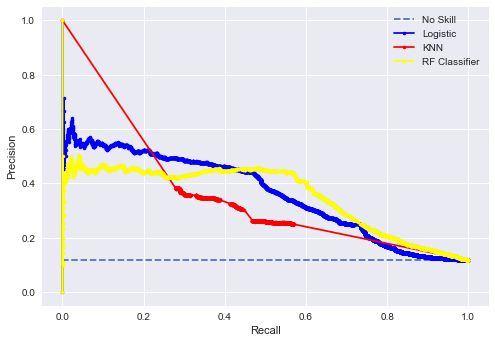

In [109]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic', color='blue')
plt.plot(knn_recall, knn_precision, marker='.', label='KNN',color='red')
plt.plot(rf_recall, rf_precision, marker='.', label='RF Classifier',color='yellow')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

The AUC value between these models are near which are in range 0.36. On top of that the PRECISION of the models are quite low too. **We decide to use the best model with highest F-1 score which is Random Forest with value 44%.**

Precision-Recall curve is a curve that combines precision (PPV) and Recall (TPR) in a single visualization. For every threshold, you calculate PPV and TPR and plot it. **The higher on y-axis your curve is the better your model performance.** You can use this plot to make an educated decision when it comes to the classic precision/recall dilemma. Obviously, the higher the recall the lower the precision. Knowing at which recall your precision starts to fall fast can help you choose the threshold and deliver a better model.

References :
* [F1 Score vs ROC AUC vs Accuracy vs PR AUC: Which Evaluation Metric Should You Choose?](https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc)



## Feature Importances

### 5.10 Feature Importance Random Forest

Shapley Values Feature Importance

In [110]:
# load JS visualization code to notebook
import shap
#shap.initjs()

# Explain the model’s predictions using shap
explainer = shap.TreeExplainer(RF_class)
shap_values1 = explainer.shap_values(X_test)

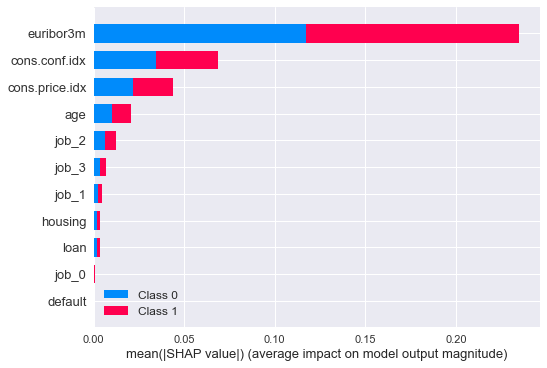

In [111]:
#Plotting our Results
# Summary Plot
shap.summary_plot(shap_values1, features=X_test, feature_names=X_test.columns)

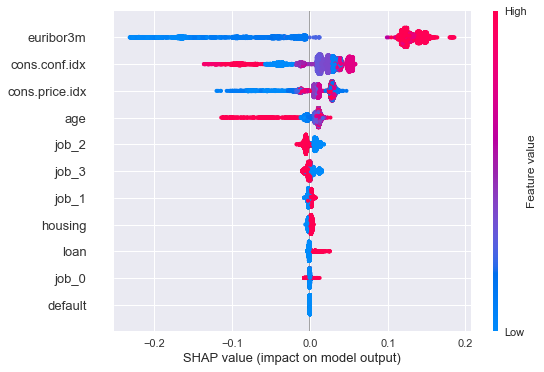

In [113]:
 # package used to calculate Shap values
#import shap
# Create object that can calculate shap values
explainer1 = shap.TreeExplainer(RF_class)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values1 = explainer1.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values1[0], X_test)

In the chart above, we can conclude the following insights:

* **Higher value of “Euribor” (High Interest Rate) leads to higher chance of clients to accept the campaign**. Lower value of “Euribor” (Low Interest Rate) leads to higher chance of clients to do not accept campaign(Decline the offer).
* **Higher value of “cons.conf.idx” leads to higher chance to of clients to accept the campaign as well**. 
* **Lower value of “cons.price.idx” leads to higher the chance of clients to decline the campaign(Decline the offer)**.

By doing feature importance selection, we know that top 3 features that mostly affect target variables are `euribor3m`, `cons.conf.idx` and`cons.price.idx` . As we explained before those three are socio-economic parameters, from them we can analysis that `euribor3m` has the highest influence to the target. The euribor itself is **The 3-months interest rate is a representative short-term interest rate series for the domestic money market, It is the rate at which euro InterBank term deposits are offered by one prime bank to another prime bank**.

Euribor rates are an important benchmark for a range of euro-denominated financial products, including mortgages, savings accounts, car loans, and various derivatives securities. So when the interest rate offered by banks is high, the clients tend to accept the campaign. When the central bank's interest rate is high, the value of financial product like bond and deposit will increase. **Savings are more attractive due to higher deposit rates, financials sector such as banks, mortgage and insurance companies stand to benefit as interest rate hikes**. Individuals may consider investing in assets, businesses or sectors that will benefit from rising interest rate.

References :
* [Euro Interbank Offer Rate (Euribor)](https://www.investopedia.com/terms/e/euribor.asp)
* [How to invest when interest rates change?](https://www.dbs.id/id/treasures/articles/bagaimana-cara-berinvestasi-bila-suku-bunga-berubah#:~:text=When%20Interest%20Rate%20Falls,economic%20growth%20and%20increases%20inflation.&text=The%20cost%20for%20businesses%20to,and%20expansion%20and%20product%20development.)


From `cons.conf.idx` we can see the inflation rate, clients likely to accept campaign where interest rate>inflation. So `cons.conf.idx` by analysing it we can see how much confidence people to then/current economy if CCI high they likely to deposit their money. `age` doesn't affect the target too much like other three socio-economic parameters but it is indeed one of importance features.

### 5.11 Feature Importance Logistic Regression

In [114]:
# Get importances
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': LogReg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

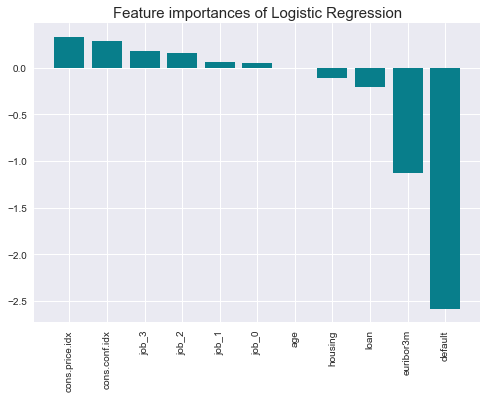

In [115]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances of Logistic Regression', size=15)
plt.xticks(rotation='vertical')
plt.show()

By doing features importance with logistic regression, we can compare with Random Forest feature importances. from these 2 models there are 2 features that have same pattern which are `cons.price.idx` and `cons.conf.idx`, both of them affect the target responses when the response is "yes".

# Part 6. Conclusion and Recommendation <a id="part6"></a>

<img src='https://media.baamboozle.com/uploads/images/162063/1635813072_25983.gif' width='400'>

**The main objective of this project is to enchance the effectiveness of the bank's telemarketing campaign,which was succesfully met through data analysis, visualization and analytical model building. A target customer profile was established while classification model were built to predict customer's response to the term deposit campaign.**

## Conclusion :
According to previous analysis, a target customer profile can be established. The most responsive customers possess these features:
* Feature 1 : age <30 or age >60
* Feature 2 : students or retired people

By analyzing the socio-economic factors. The most best environtment for deposit to clients are :
* Feature 3 : High interest rate or high Euribor3m
* Feature 4 : clients prefer to deposit when CPI is high(interest rate<inflation) - Low CPI
* Feature 5 : client's confidence to then/current economiy is high (high CCI)

By applying random forest algorithm, classification and estimation model were successfully built. with this model, the bank will be able to predict a customer's response to its telemarketing campaign before calling this customer. In this way, the bank can allocate more marketing efforts to the clients who are classified as highly likely to accept term deposit, and call less to those who are unlikely to make term deposits.

Also Because this dataset also taken during 2008-2009 financial crisis, we should consider other situation which is why clients even though the interest rate is low they keep deposit. **During that time the possibility of clients to chose the deposit rather than using it to stimulate the economy because they can generate small profit from small interest rate than buying things when the inflation was high**.

## Recommendations

**1. More appropriate timing**

When implementing a marketing strategy, external factors, such as the time of calling, should also be carefully considered. The previous analysis points out that March, September, October and December had the highest success rates. Nevertheless, more data should be collected and analyzed to make sure that this seasonal effect is constant over time. If the trend has the potential to continue in the future, the bank should consider initiating its telemarketing campaign in fall and spring. 

**2. Smarter marketing design**

By targeting the right customers, the bank will have more and more positive responses, and the classification algorithms would ultimately eliminate the imbalance in the original dataset. Hence, more accurate information will be presented to the bank for improving the subscriptions. Meanwhile, to increase the likelihood of subscription, the bank should re-evaluate the content and design of its current campaign, making it more appealing to its target customers. 

**3. Better services provision**

With a more granular understanding of its customer base, the bank has the ability to provide better banking services.
For example, marital status and occupation reveal a customer's life stage while loan status indicates his/her overall risk profile. With this information, the bank can estimate when a customer might need to make an investment. In this way, the bank can better satisfy its customer demand by providing banking services for the right customer at the right time.